# K-Nearest Neighbors Classifier

### Import library required
Librari yang digunakan adalah **pandas, numpy, matplotlib, seaborn, dan sklearn**. Silahkan install terlebih dahulu jika belum menginstallnya dengan perintah `pip install nama-library`.

In [28]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

### Load Data
Data yang digunakan adalah data bawaan sklearn library. Jika ingin menggunakan data sendiri silahkan pakai perintah `pd.read_csv()` atau `pd.read_excel()`

In [14]:
data = load_wine(as_frame=True)
data.data.assign(target=data.target_names[data.target]).head(15)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,class_0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,class_0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,class_0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,class_0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,class_0


### Split Data
Fungsi `train_test_split`, secara default akan membagi data menjadi 75% data training dan 25% data test. Untuk mengaturnya dapat menggunakan argument `test_size` atau `train_size`. Contoh `train_test_split(X, y, train_test = 0.8)`

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
print("Jumlah Training Data : ", X_train.size, " | Jumlah Test Data : ", y_train.size)

Jumlah Training Data :  1729  | Jumlah Test Data :  133


### Scale Features to Minimize Computation

In [19]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Make Model

In [21]:
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
clf.fit(X_train, y_train)
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

### Predict Test Set with that Model

In [22]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1])

### Check Accuracy

In [25]:
print('Accuracy: ', clf.score(X_test, y_test))

Accuracy:  0.9777777777777777


### Make Confusion Matrix

<IPython.core.display.Javascript object>


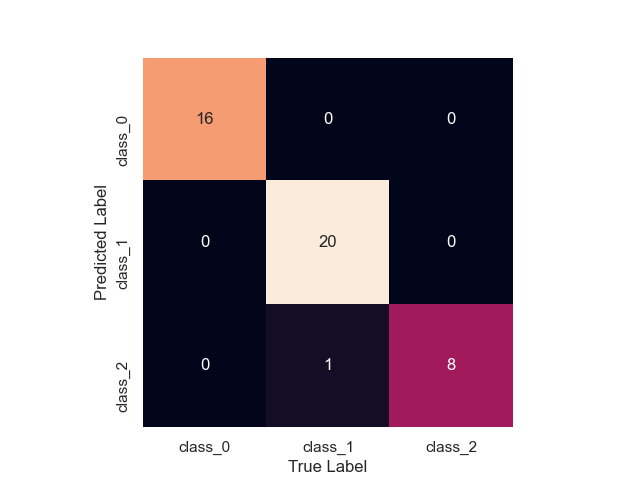

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm.T, annot=True, square=True, xticklabels=data.target_names, fmt='d',
           yticklabels=data.target_names, cbar=False)

plt.xlabel('True Label')
plt.ylabel('Predicted Label');

<IPython.core.display.Javascript object>


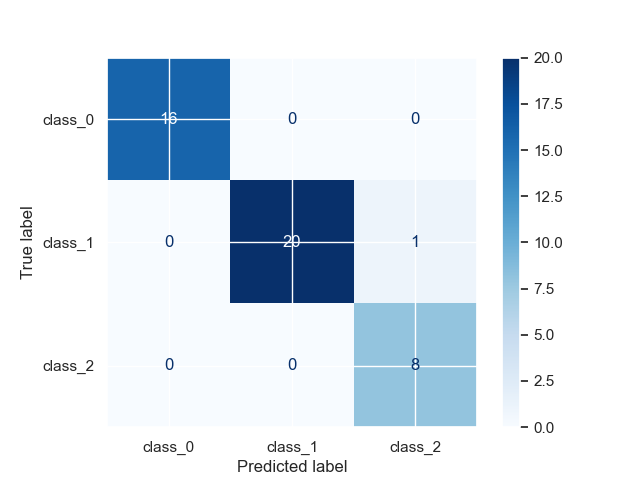

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels=data.target_names, cmap='Blues');